In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Phone4.csv")

In [3]:
df

,4G,5G,Announced,Status,Weight,Length,Width,Diameter,Has IP68,Battery_capacity,...,Chipset Name,Chipset Brand,Lithography (nm),Max Storage (GB),Max RAM (GB),Bluetooth Version,Loudspeaker,OS,Price,brand
0,True,True,"2023, September 01","Available. Released 2023, September 25",182.0,154.0,68.0,8.6,True,5000.0,...,Qualcomm SM8550-AB Snapdragon 8 Gen 2,Qualcomm,4.0,256.0,8.0,5.3,True,"Android 13, upgradable to Android 14",894.90,sony
1,True,True,"2023, May 11","Available. Released 2023, July 28",187.0,165.0,71.0,8.3,True,5000.0,...,Qualcomm SM8550-AB Snapdragon 8 Gen 2,Qualcomm,4.0,512.0,12.0,5.3,True,"Android 13, upgradable to Android 14",982.08,sony
2,True,True,"2023, May 11","Available. Released 2023, June 21",159.0,155.0,68.0,8.3,True,5000.0,...,Qualcomm SM6375 Snapdragon 695 5G,Qualcomm,6.0,128.0,8.0,5.1,True,"Android 13, upgradable to Android 14",307.63,sony
3,True,True,"2022, September 01","Available. Released 2022, September 22",172.0,156.0,67.0,8.2,True,5000.0,...,Qualcomm SM8450 Snapdragon 8 Gen 1,Qualcomm,4.0,256.0,8.0,5.2,True,"Android 12, upgradable to Android 13",440.00,sony
4,True,True,"2022, May 11","Available. Released 2022, June 11",185.0,165.0,71.0,8.2,True,5000.0,...,Qualcomm SM8450 Snapdragon 8 Gen 1,Qualcomm,4.0,512.0,16.0,5.2,True,"Android 12, upgradable to Android 13",939.99,sony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,True,False,"2014, July. Released 2014, July",Discontinued,160.0,NaN,76.0,8.7,False,3100.0,...,Qualcomm MSM8974AC Snapdragon 801,Qualcomm,28.0,32.0,2.0,4.0,True,"Android 4.4.2 (KitKat), nubia UI 2",240.00,ZTE
5906,True,False,"2014, July. Released 2014, July",Discontinued,143.0,NaN,NaN,8.2,False,2300.0,...,Qualcomm MSM8974AA Snapdragon 801,Qualcomm,28.0,16.0,2.0,4.0,True,"Android 4.4.2 (KitKat), nubia UI 2",180.00,ZTE
5907,True,False,"2015, May. Released 2015, June",Discontinued,192.0,NaN,NaN,8.9,False,2900.0,...,Qualcomm MSM8994 Snapdragon 810,Qualcomm,20.0,64.0,4.0,4.1,True,"Android 5.2 (Lollipop), nubia UI 3",350.00,ZTE
5908,True,False,"2015, March. Released 2015, April",Discontinued,165.0,NaN,NaN,7.9,False,2900.0,...,Qualcomm MSM8994 Snapdragon 810,Qualcomm,20.0,16.0,3.0,4.1,True,"Android 5.0.2 (Lollipop), nubia UI 2.8",200.00,ZTE


In [4]:
# این تابع سال رو به صورت عددی از دیتافریم جدا میکنه
def extract_year(date):
    try:
        if pd.isna(date) or not isinstance(date, str):
            return None
        if ',' in date:
            year = date.split(',')[0].strip()
        elif 'Released' in date:
            year = date.split('.')[0].strip()
        else:
            year = date.strip()
        return int(year) if year.isdigit() else None
    except:
        return None


In [5]:
# این تابع ماه رو به صورت مپ شده و عددی برمیگرداند
def extract_month(date):
    month_map = {
        "January": 1, "February": 2, "March": 3, "April": 4,
        "May": 5, "June": 6, "July": 7, "August": 8,
        "September": 9, "October": 10, "November": 11, "December": 12,
        "Q1": 3, "Q2": 6, "Q3": 9, "Q4": 12  
    }
    try:
        if pd.isna(date) or not isinstance(date, str):
            return None
        for month in month_map:
            if month in date:
                return month_map[month]
        return None
    except:
        return None


In [6]:
df['Announced_Year'] = df['Announced'].apply(extract_year)

In [7]:
df['Announced_Month'] = df['Announced'].apply(extract_month)

In [8]:
#این تابع وضعیت محصول رو بر میگرداند
def extract_status(status):
   
    if pd.isna(status):  
        return None
    status = status.lower()  
    if "available" in status:
        return "Available"
    elif "discontinued" in status:
        return "Discontinued"
    elif "cancelled" in status:
        return "Cancelled"
    else:
        return "Unknown"

df['Product_Status'] = df['Status'].apply(extract_status)


In [9]:
df.loc[df["Product_Status"] == "Unknown", "Product_Status"] = "Available"


In [10]:
#########


In [11]:
#به این دلیل که بعضی از رزولیشن ها خیلی قدیمی و نامعتبر بوده و نمیتوان به صورت عددی با انها برخورد کرد انهارا حذف کرده
df = df[~df['Resolution'].str.contains('lines|chars|pi|characters', na=False)]


In [12]:
df['Widthpi'] = df['Resolution'].apply(lambda x: int(x.split('x')[0].strip()) if pd.notnull(x) and 'x' in x else None)
df['Heightpi'] = df['Resolution'].apply(lambda x: int(x.split('x')[1].strip()) if pd.notnull(x) and 'x' in x else None)

In [13]:
#برای بررسی رزولیشن تعداد پیکسل های طول را در پیکسل های عرض ضرب کرده تا به یک ستون عددی دست پیدا کنیم
df['Total_Pixels'] = df['Widthpi'] * df['Heightpi']


In [14]:
#برای استخراج کیفیت دوربین به صورت عددی این تابع کار را انجام میدهد
def parse_camera_quality_split(value):
    if pd.isna(value): 
        return None
    
    value = str(value).lower().strip()  
    
    if 'vga' in value:
        return 0.3 
    if 'cif' in value:
        return 0.1  
    if 'qvga' in value:
        return 0.1
    if 'no' in value or 'uses main' in value:
        return None
    
    if '/' in value or 'or' in value:
        parts = value.replace('/', ' or ').split(' or ') 
        numbers = [float(part.split(' ')[0]) for part in parts if 'mp' in part and part.split(' ')[0].replace('.', '').isdigit()]
        return max(numbers) if numbers else None  
    
    parts = value.split(' ')  
    for part in parts:
        if 'mp' in part and parts[0].replace('.', '').isdigit():
            return float(parts[0]) 
    
    return None


In [15]:
df['Main_Camera_Quality'] = df['Main Camera Quality'].apply(parse_camera_quality_split)
df['Selfie_Camera_Quality'] = df['Selfie Camera Quality'].apply(parse_camera_quality_split)


In [16]:
df.iloc[0]

4G                                                                    True
5G                                                                    True
Announced                                               2023, September 01
Status                              Available. Released 2023, September 25
Weight                                                               182.0
Length                                                               154.0
Width                                                                 68.0
Diameter                                                               8.6
Has IP68                                                              True
Battery_capacity                                                    5000.0
Display Type                                                         OLED,
Display Size                                                           6.1
Resolution                                                     1080 x 2520
Body Ratio               

In [17]:
df['CPU Architecture'] = df['CPU Architecture'].apply(lambda x: eval(x) if pd.notnull(x) else [])


In [18]:
#این تابع تعداد هسته های سی پی یو را برمیگرداند
df['CPU_Cores'] = df['CPU Architecture'].apply(len)


In [19]:
# سی پی یو ها به دو دسته کابرد عادی و کاربرد عملکردی تقسیم شده و تعداد هر کدام برمیگردد
performance_cores = ['Cortex-X4', 'Cortex-X3', 'Cortex-X2', 'Cortex-X1', 'Cortex-A77', 'Cortex-A76', 'Cortex-A78']
efficiency_cores = ['Cortex-A53', 'Cortex-A510', 'Cortex-A7', 'Cortex-A5']

df['Performance_Cores'] = df['CPU Architecture'].apply(lambda x: sum(1 for core in x if core in performance_cores))
df['Efficiency_Cores'] = df['CPU Architecture'].apply(lambda x: sum(1 for core in x if core in efficiency_cores))


In [20]:
# سی پی یو هایی که در موبایل های گران و جدید استفاده شده اند این لیست را شامل میشوند به طور معمول لذا این مورد نیز بررسی میشود
def extract_advanced_core(cores):
    advanced_cores = ['Cortex-X4', 'Cortex-X3', 'Cortex-X2', 'Cortex-X1']
    
    if pd.isnull(cores):
        return "None"
    
    if isinstance(cores, str):
        for core in advanced_cores:
            if core in cores:
                return core
        return "Other"
    
    if isinstance(cores, (list, np.ndarray)):
        for core in advanced_cores:
            if core in cores:
                return core
        return "Other"
    
    return "Invalid"


In [21]:
# مشخص میشود که چیپست استفاده شده به طور معمول در گروه چیپست های گوشی های پرچمدار است یا گوشی های میان رده و یا گوشی های رده پایین
def classify_performance(chipset_name):
    if pd.isnull(chipset_name):
        return "Unknown"
    chipset_name = chipset_name.lower()
    if any(keyword in chipset_name for keyword in ["snapdragon 8", "a1", "dimensity 9000", "kirin 9000", "m1", "x1"]):
        return "Flagship"
    elif any(keyword in chipset_name for keyword in ["snapdragon 7", "dimensity 700", "dimensity 800", "exynos 9", "kirin 800", "helio g"]):
        return "Mid-Range"
    elif any(keyword in chipset_name for keyword in ["snapdragon 4", "snapdragon 6", "helio p", "helio a", "dimensity 600", "unicorn"]):
        return "Entry-Level"
    else:
        return "Legacy"

df['Performance_Tier'] = df['Chipset Name'].apply(classify_performance)


In [22]:
#نوع صفحه نمایش و تکنولوژی ان به چندین گروه تقسیم میشود
def classify_display_technology(display_type):
    if pd.isnull(display_type):
        return "Unknown"
    display_type = display_type.lower()
    if any(keyword in display_type for keyword in ["oled", "p-oled", "g-oled", "amoled"]):
        return "OLED"
    elif any(keyword in display_type for keyword in ["ips", "s-ips", "ah-ips", "ips+"]):
        return "IPS"
    elif any(keyword in display_type for keyword in ["tft", "lcd", "cstn", "stn"]):
        return "TFT"
    elif any(keyword in display_type for keyword in ["ltpo", "retina", "ufs", "ufb"]):
        return "Advanced LCD"
    elif any(keyword in display_type for keyword in ["foldable", "transparent", "rotating"]):
        return "Special"
    else:
        return "Other"

df['Display_Technology'] = df['Display Type'].apply(classify_display_technology)


In [23]:
#این ستون ها پیش پردازش شده و از انها ستونهایی استخراج شده پس انها رو حذف میکنیم
data = df.drop(columns=["Announced","Status","Widthpi", "Heightpi","Resolution","Main Camera Quality","Selfie Camera Quality",
                     "CPU Architecture","Chipset Brand"])

In [24]:
import pandas as pd

numeric_columns = [
    '4G', '5G', 'Weight', 'Length', 'Width', 'Diameter', 'Has IP68',
    'Battery_capacity', 'Display Size', 'Body Ratio', 'PPI',
    'Camera Count', 'Max Frequency (GHz)', 'Lithography (nm)', 'Max Storage (GB)', 
    'Max RAM (GB)', 'Bluetooth Version', 'Price', 'Announced_Year',
    'Announced_Month', 'Total_Pixels', 'Main_Camera_Quality',
    'Selfie_Camera_Quality', 'CPU_Cores', 'Performance_Cores', 
    'Efficiency_Cores'
]

correlation_matrix = data[numeric_columns].corr()

correlation_matrix.to_csv("correlation_matrix.csv")

print(correlation_matrix)


                             4G        5G    Weight    Length     Width  \
4G                     1.000000  0.322449  0.329979  0.468612  0.407997   
5G                     0.322449  1.000000  0.196868  0.229308  0.163911   
Weight                 0.329979  0.196868  1.000000  0.898394  0.952052   
Length                 0.468612  0.229308  0.898394  1.000000  0.923552   
Width                  0.407997  0.163911  0.952052  0.923552  1.000000   
Diameter              -0.621780 -0.225358 -0.403155 -0.581999 -0.514421   
Has IP68               0.220490  0.250609  0.051104  0.077440  0.036692   
Battery_capacity       0.642837  0.389139  0.809207  0.890829  0.855902   
Display Size           0.609607  0.312750  0.849941  0.943559  0.911658   
Body Ratio             0.758607  0.378384  0.486401  0.713438  0.600681   
PPI                    0.700044  0.391846  0.167403  0.358526  0.249590   
Camera Count           0.498726  0.569426  0.146499  0.273430  0.109077   
Max Frequency (GHz)    0.

In [25]:
#چون همبستگی وزن با ابعاد بالا بوده و ابعاد ستون های خالی زیادی دارند انها را حذف میکنیم
data = data.drop(columns=["Length","Width"])
# Announced_Month به دلیل همبستگی بسیار پایین با قیمت حذف میشود 
# efficiency coresبه دلیل همبتسگی کم با قیمت حذف شده
# چندین ستون ویژگی هایی مشابه ستون های دیگر بیان میکردند انها لذا همگی حذف شدند
data2 = data.drop(columns=["Diameter","Announced_Month","Selfie_Camera_Quality","PPI","Camera Count","Efficiency_Cores","Lithography (nm)"
                          ])

In [26]:
missing_counts = data2.isnull().sum().sort_values(ascending=False)
print(missing_counts)


Max RAM (GB)           2769
Max Frequency (GHz)    2667
Chipset Name           2414
Max Storage (GB)       2219
OS                     1731
Price                  1191
Bluetooth Version       797
Main_Camera_Quality     597
Body Ratio              592
Display Size            343
Battery_capacity        338
Weight                  299
Announced_Year          109
Total_Pixels             24
Product_Status            0
Performance_Cores         0
CPU_Cores                 0
Performance_Tier          0
4G                        0
brand                     0
Loudspeaker               0
5G                        0
Display Type              0
Has IP68                  0
Display_Technology        0
dtype: int64


In [27]:
#ستون هایی با تعداد خالی کم به روش میانگین و یا میانه بر اساس چولگی روش انتخاب شده و پر میشوند
data2['Main_Camera_Quality'].fillna(data2['Main_Camera_Quality'].median(), inplace=True)
data2['Total_Pixels'].fillna(data2['Total_Pixels'].mean(), inplace=True)
data2['Body Ratio'].fillna(data2['Body Ratio'].mean(), inplace=True)
data2['Display Size'].fillna(data2['Display Size'].mean(), inplace=True)
data2['Battery_capacity'].fillna(data2['Battery_capacity'].median(), inplace=True)
data2['Weight'].fillna(data2['Weight'].mean(), inplace=True)
data2['Announced_Year'].fillna(data2['Announced_Year'].median(), inplace=True)


In [28]:
#ستون هایی که تعداد بیشتری خانه خالی داشتند بررسی شد که تاثیر به سزایی در قیمت دارند پس حذف انها منطقی نبود لذا باروش
#knn تصمیم به پر کردن انها گرفته شد
from sklearn.impute import KNNImputer

numeric_columns = ['Max RAM (GB)', 'Max Frequency (GHz)', 'Max Storage (GB)']
imputer = KNNImputer(n_neighbors=5)

data2[numeric_columns] = imputer.fit_transform(data2[numeric_columns])


In [29]:
data3 = data2.drop(columns=["Chipset Name","OS","Bluetooth Version","Display Type"])

In [30]:
missing_counts = data3.isnull().sum().sort_values(ascending=False)
print(missing_counts)


Price                  1191
4G                        0
Performance_Tier          0
Performance_Cores         0
CPU_Cores                 0
Main_Camera_Quality       0
Total_Pixels              0
Product_Status            0
Announced_Year            0
brand                     0
Loudspeaker               0
5G                        0
Max RAM (GB)              0
Max Storage (GB)          0
Max Frequency (GHz)       0
Body Ratio                0
Display Size              0
Battery_capacity          0
Has IP68                  0
Weight                    0
Display_Technology        0
dtype: int64


###   برای عددی کردن ستون های کتگوریکال برای انهایی که ترتیب منطقی ای خاصی میتوان لحاظ شد از روش مپ کردن استفاده شد
### و برای برند که ترتیب عددی بی معنا است از روش 
### One-Hot Encoding
### استفاده میشود

In [31]:
performance_mapping = {
    'Legacy': 0,
    'Entry-Level': 1,
    'Mid-Range': 2,
    'Flagship': 3,
    'Unknown': -1  
}

data3['Performance_Tier'] = data3['Performance_Tier'].map(performance_mapping)


In [32]:
display_tech_mapping = {
    'TFT': 0,
    'IPS': 1,
    'Advanced LCD': 2,
    'OLED': 3,
    'Special': 4,
    'Other': -1  
}

data3['Display_Technology'] = data3['Display_Technology'].map(display_tech_mapping)


In [33]:
#این ستون ها باینری ثبت شدند یعنی صفر و یکی پس همان ها را تبدیل به عدد کرده و گویی مپ شده اند
binary_columns = ['4G', '5G', 'Has IP68', 'Loudspeaker']
for col in binary_columns:
    data3[col] = data3[col].astype(int)


In [34]:
status_mapping = {
    'Available': 2,
    'Discontinued': 1,
    'Cancelled': 0
}

data3['Product_Status'] = data3['Product_Status'].map(status_mapping)


In [35]:
data3 = pd.get_dummies(data3, columns=['brand'], drop_first=True)


In [36]:
for column in data3.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Column: {column}")
    print(f"Min: {data3[column].min()}")
    print(f"Max: {data3[column].max()}")
    print(f"Mean: {data3[column].mean()}")
    print(f"Std: {data3[column].std()}")
    print("_-_" * 15)


Column: Weight
Min: 0.0
Max: 950.0
Mean: 160.46780549075902
Std: 97.99935094896412
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Battery_capacity
Min: 8.0
Max: 12300.0
Mean: 2536.695333787466
Std: 1787.0516056660595
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Display Size
Min: 0.95
Max: 18.4
Mean: 4.624570446735395
Std: 2.2034705752947827
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Body Ratio
Min: 7.6
Max: 180.8
Mean: 58.0042803030303
Std: 21.437955392310215
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Max Frequency (GHz)
Min: 1.0
Max: 3.78
Mean: 1.779163261911948
Std: 0.48788877599547836
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Max Storage (GB)
Min: 1.0
Max: 640.0
Mean: 87.98461857336474
Std: 102.68879971862242
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Max RAM (GB)
Min: 1.0
Max: 24.0
Mean: 3.953284682749664
Std: 2.7903942526005565
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Column: Price
Min: 10.0
Max: 13000.0
Mean: 214.6

In [37]:
# بررسی شد که میانگین موبایل های بسیار جدید و حتی تبلت ها باز هم به عدد 2500 یورو نمیرسند پس این داده ها برای موبایل نیستند و حذف میشوند
data3 = data3.loc[(data3["Price"] < 2500) | (data3["Price"].isna())]


In [38]:
data3.describe().T[['min', 'max', 'mean', 'std']]


,min,max,mean,std
4G,0.00,1.00,0.450920,4.976278e-01
5G,0.00,1.00,0.078562,2.690764e-01
Weight,0.00,950.00,160.501696,9.800425e+01
Has IP68,0.00,1.00,0.045671,2.087893e-01
Battery_capacity,8.00,12300.00,2537.566462,1.786851e+03
Display Size,0.95,18.40,4.625581,2.202704e+00
Body Ratio,7.60,102.00,57.983354,2.138525e+01
Max Frequency (GHz),1.00,3.78,1.779118,4.877310e-01
Max Storage (GB),1.00,640.00,87.939531,1.025639e+02
Max RAM (GB),1.00,24.00,3.952329,2.789253e+00


In [39]:
#از این روش برای حذف داده های پرت استفاده شد برای ستون های عددی
numeric_columns = data3.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = data3[column].quantile(0.25)  
    Q3 = data3[column].quantile(0.75)  
    IQR = Q3 - Q1                     

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data4 = data3[(data3[column] >= lower_bound) & (data3[column] <= upper_bound)]


In [40]:
#بررسی شد که وزن موبایل ها و تبلت ها در حدود 50 تا 500 هستند و چون پیش بینی ما برای موبایل هست و نه ساعت هوشمند و..حذف شدند
#ازانجایی که وزن هیچ موبایلی 0 نیست پس این ها به اشتباه ثبت شده اند
data4['Weight'] = data4['Weight'].replace(0, data4['Weight'].mean())
data4 = data4[data4["Weight"] <= 500]
data4 = data4[data4["Weight"] >=50]


In [41]:
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Weight', 'Battery_capacity', 'Display Size', 'Body Ratio', 
                   'Max Frequency (GHz)', 'Max Storage (GB)', 'Max RAM (GB)', 
                   'Total_Pixels', 'Main_Camera_Quality', 'Price']
data4[numeric_columns] = scaler.fit_transform(data4[numeric_columns])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

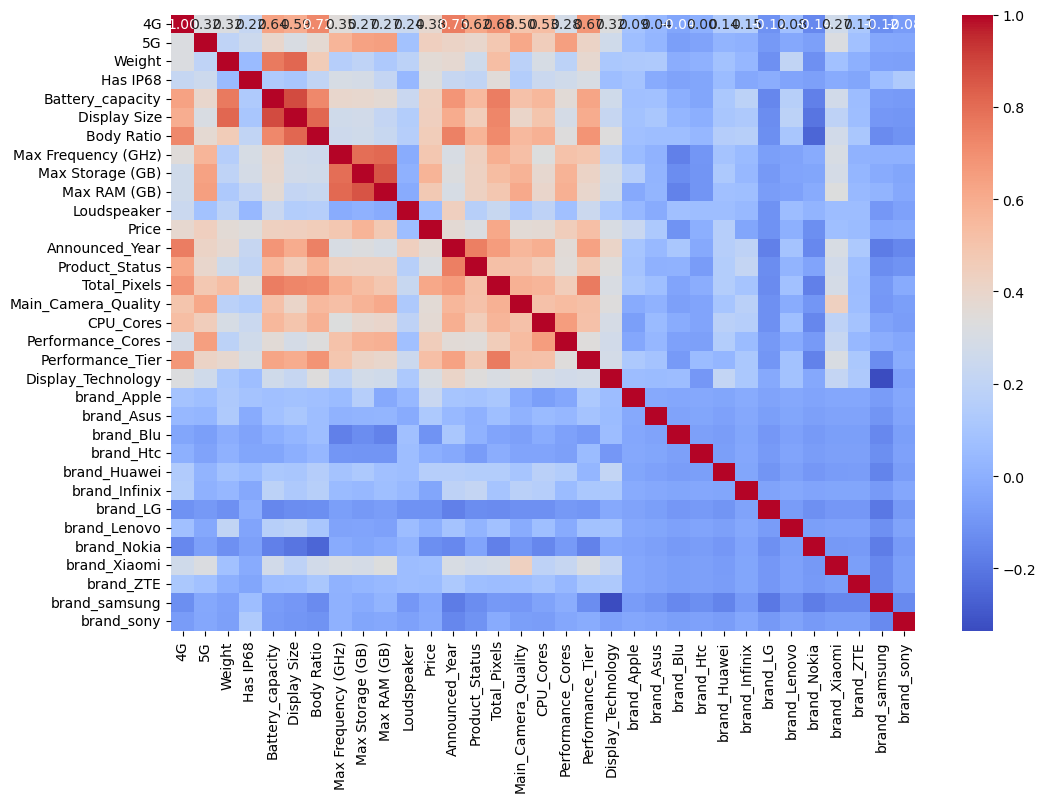

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


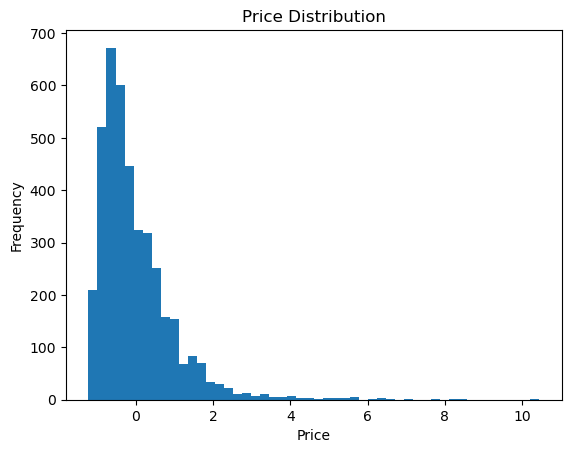

In [43]:
import matplotlib.pyplot as plt

plt.hist(data4['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [44]:
# چون توزیع داده ها در مدل رندوم فارست چندان اهمیت ندارد با همین توزیع ادامه میدهیم البته با این شدت چولگی میتوان از مقادیر لگاریتم گرفت

In [45]:
data4 = data4.dropna(subset=['Price'])

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib 

# تعیین تارگت و فیچرها
X = data4.drop(columns=['Price'])
y = data4['Price']

# همانطور که گفته شد 15 درصد داده ها از اول جدا شده و از انها برای تست نهایی استفاده میشود
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=250,  
    max_depth=20,       
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=2,
    n_jobs=-1
)
#اموزش مدل 
rf_model.fit(X_train, y_train)

# ارزیابی روی اعتبارسنجی
y_val_pred = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

joblib.dump(rf_model, "random_forest_model.pkl")

# پیش بینی بر روی داده های تست
y_test_pred = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R2: {r2_test}")



Test MSE: 0.1906208663866226
Test R2: 0.8006444043027469


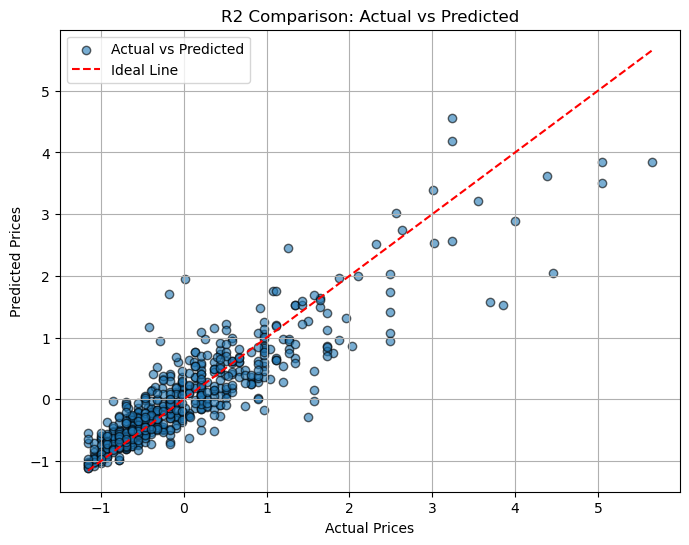

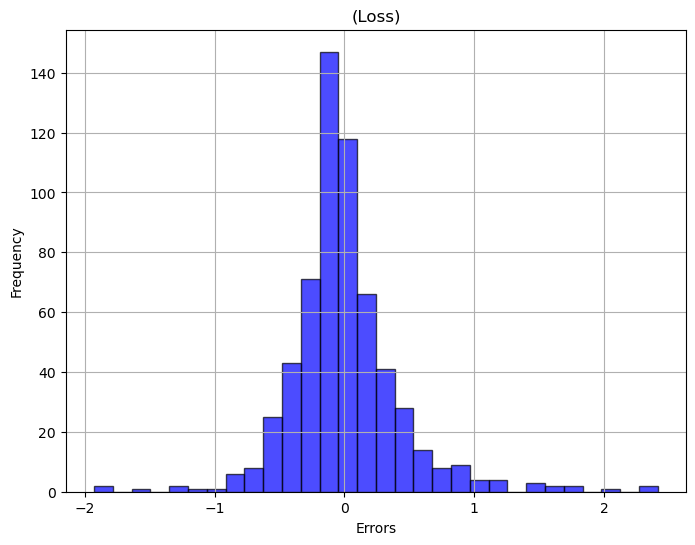

In [47]:
import matplotlib.pyplot as plt

y_test_values = y_test.values  
y_test_pred_values = y_test_pred  

plt.figure(figsize=(8, 6))
plt.scatter(y_test_values, y_test_pred_values, alpha=0.6, edgecolor='k', label="Actual vs Predicted")
plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], 'r--', label="Ideal Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("R2 Comparison: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

errors = y_test_values - y_test_pred_values
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue', edgecolor='k')
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.title("(Loss)")
plt.grid(True)
plt.show()



In [48]:
import numpy as np
import joblib

rf_model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

y_test_pred = rf_model.predict(X_test)
price_mean = scaler.mean_[-1]  # میانگین قیمت
price_std = np.sqrt(scaler.var_[-1])  # انحراف معیارر


# برای معکوس کردن استاندارد سازی باید ازین فرمول استفاده کنیم که تمام مراحل برعکس شود
y_test_pred_original = y_test_pred * price_std + price_mean
y_test_original = y_test * price_std + price_mean

for i in range(20):
    print(f"Actual: {y_test_original.iloc[i]}, Predicte: {y_test_pred_original[i]}")


Actual: 180.0, Predicte: 89.95686242214877
Actual: 220.0, Predicte: 252.42720855427027
Actual: 350.0, Predicte: 260.65504030478496
Actual: 220.0, Predicte: 190.01294333333334
Actual: 130.0, Predicte: 173.45663865546217
Actual: 169.58, Predicte: 221.03169040636897
Actual: 150.0, Predicte: 146.66405680684502
Actual: 230.0, Predicte: 268.7803837535015
Actual: 180.0, Predicte: 139.4724635331774
Actual: 600.0, Predicte: 511.40395999999913
Actual: 110.0, Predicte: 107.83946875978074
Actual: 140.0, Predicte: 107.3468060953765
Actual: 150.0, Predicte: 225.9503195510515
Actual: 80.0, Predicte: 95.24791038546691
Actual: 64.82, Predicte: 87.65026955710951
Actual: 200.0, Predicte: 195.23176432885492
Actual: 230.0, Predicte: 277.42400290909626
Actual: 99.99999999999999, Predicte: 113.39267559346968
Actual: 370.0, Predicte: 340.3200000000003
Actual: 120.0, Predicte: 140.29934823249386


# GradientBoostingRegressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib  

X = data4.drop(columns=['Price'])
y = data4['Price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(
    n_estimators=300,      
    learning_rate=0.1,      
    max_depth=4,        
    random_state=42
)

gb_model.fit(X_train, y_train)

y_val_pred = gb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

y_test_pred = gb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R2: {r2_test}")


Test MSE: 0.17954237451606833
Test R2: 0.8122305406379058


# XGBoost


In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


xgb_model = XGBRegressor(
    n_estimators=450,      
    learning_rate=0.1,     
    max_depth=3,           
    random_state=42,
    objective='reg:squarederror'  
)
xgb_model.fit(X_train, y_train)

y_val_pred = xgb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

y_test_pred = xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R2: {r2_test}")


Test MSE: 0.18020243688068152
Test R2: 0.8115402325494518


# Deep Neural Network

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X = data4.drop(columns=['Price'])
y = data4['Price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),  
    Dense(1, activation='linear') 
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])

# برای جلوگیری از اورفیتینگ
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# آموزش مدل
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

y_test_pred = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R2: {r2_test}")


Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8284 - mse: 0.8284 - val_loss: 0.5141 - val_mse: 0.5141
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.4313 - val_mse: 0.4313
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4860 - mse: 0.4860 - val_loss: 0.3935 - val_mse: 0.3935
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5005 - mse: 0.5005 - val_loss: 0.3712 - val_mse: 0.3712
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4952 - mse: 0.4952 - val_loss: 0.3579 - val_mse: 0.3579
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4059 - mse: 0.4059 - val_loss: 0.3486 - val_mse: 0.3486
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4550 - mse: 0.4550 - val_loss: 0.3439 - val_mse: 0.3439
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3625 - mse: 0.3625 - val_loss: 0.3403 - val_mse: 0.3403
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.480

Epoch 55/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2215 - mse: 0.2215 - val_loss: 0.2885 - val_mse: 0.2885
Epoch 56/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2492 - mse: 0.2492 - val_loss: 0.2945 - val_mse: 0.2945
Epoch 57/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2349 - mse: 0.2349 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 58/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1889 - mse: 0.1889 - val_loss: 0.2900 - val_mse: 0.2900
Epoch 59/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2204 - mse: 0.2204 - val_loss: 0.2932 - val_mse: 0.2932
Epoch 60/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2277 - mse: 0.2277 - val_loss: 0.2898 - val_mse: 0.2898
Epoch 61/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2055 - mse: 0.2055 - val_loss: 0.2851 - val_mse: 0.2851
Epoch 62/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.2954 - val_mse: 0.2954
Epoch 63/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo


# Clustring

### لازم است داده ها نرمال باشند که این کار قبلا انجام شده است

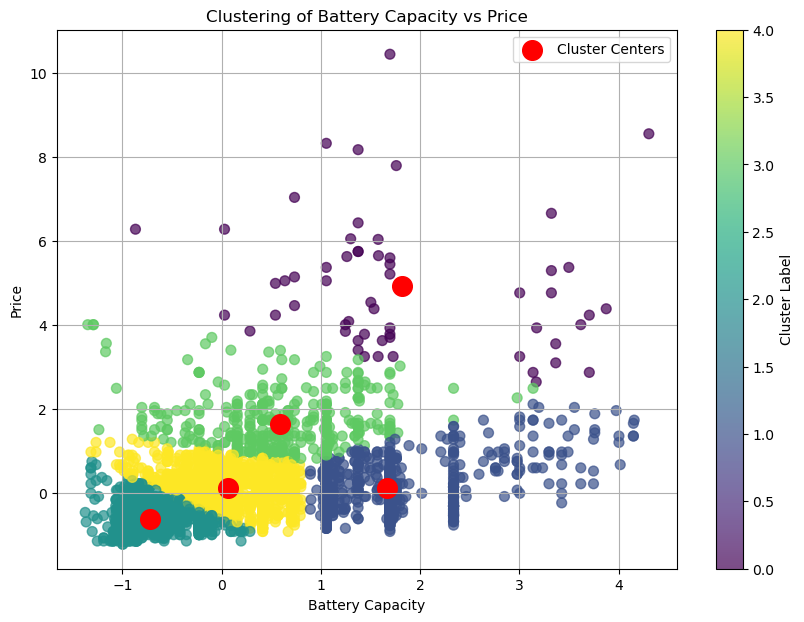

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

X = data4[['Battery_capacity', 'Price']].dropna() 

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X['Battery_capacity'], X['Price'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Cluster Centers')

plt.title('Clustering of Battery Capacity vs Price')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()



In [53]:
X = data[['Battery_capacity', 'Price']].dropna().values


In [54]:
# data['Battery_capacity'].fillna(data['Battery_capacity'].mean(), inplace=True)
# data['Price'].fillna(data['Price'].mean(), inplace=True)


In [55]:
X.shape

(4530, 2)

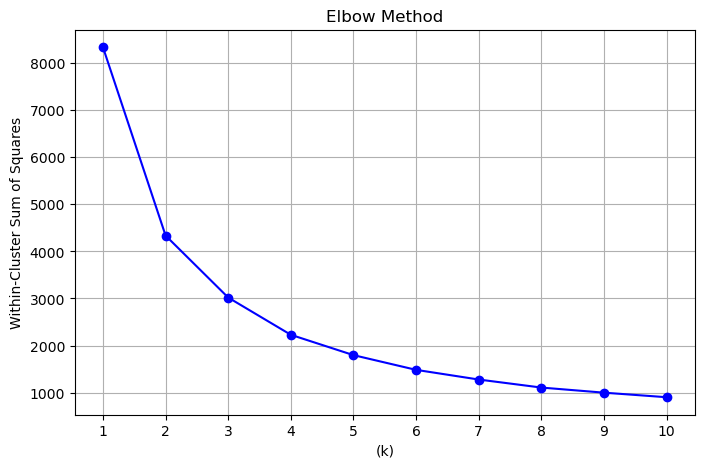

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data4[['Battery_capacity', 'Price']].dropna().values

wcss = []  
k_values = range(1, 11)  


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

#  Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('(k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(k_values)
plt.grid()
plt.show()


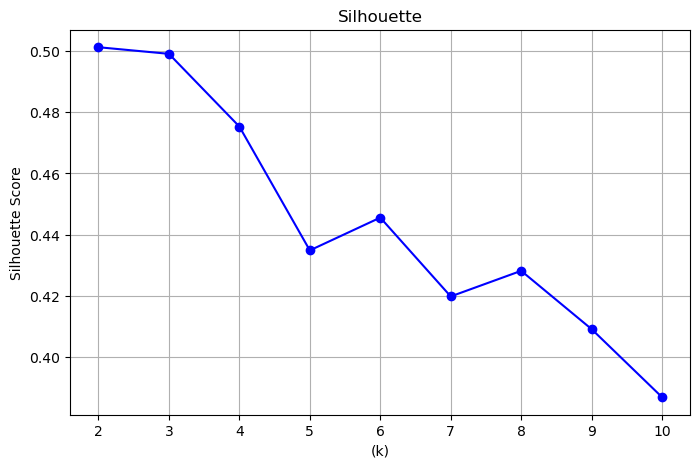

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = data4[['Battery_capacity', 'Price']].dropna().values

silhouette_scores = []  
k_values = range(2, 11)  # حداقل باید 2 خوشه باشد

#  Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels) 
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette')
plt.xlabel('(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()


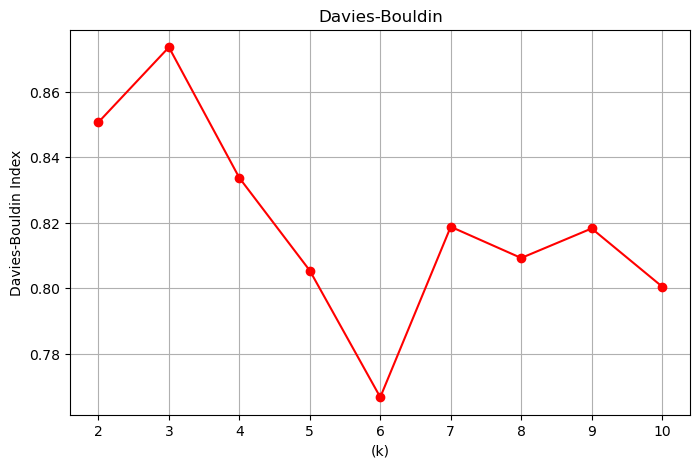

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

X = data4[['Battery_capacity', 'Price']].dropna().values

davies_bouldin_scores = [] 
k_values = range(2, 11)

# Davies-Bouldin Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, cluster_labels)  
    davies_bouldin_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin')
plt.xlabel('(k)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.grid()
plt.show()




In [59]:
#با توجه به نمودار ها 6 عدد مناسبی است اما به نظر میرسد از 2 و یا 3 هم میتوان استفاده کرد

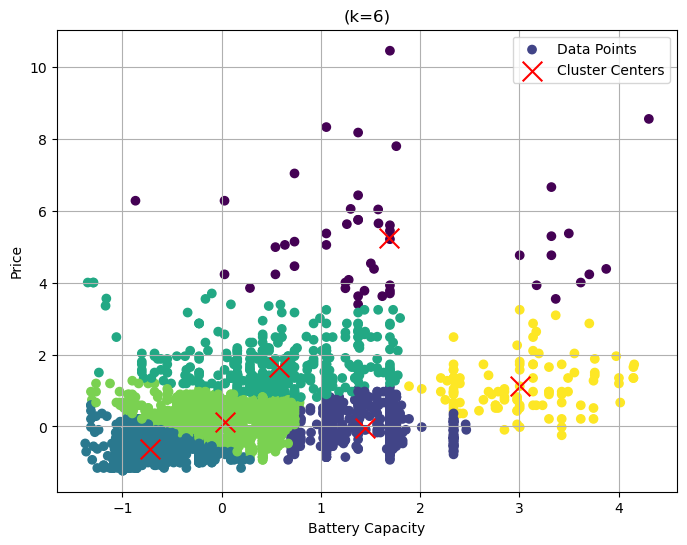

In [60]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# رسم نمودار خوشه‌ها
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Cluster Centers')
plt.title('(k=6)')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [61]:
# خوشه ها گوشی هایی قدیمی و گوشی های میان رده و گوشی های لوکس و گوشی های متوسط را نشان میدهند


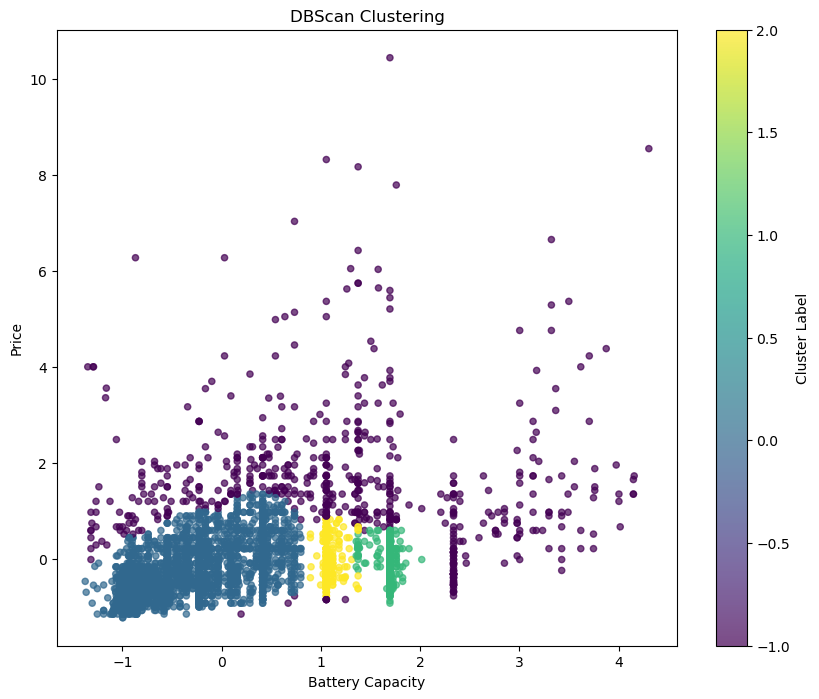

In [62]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X = data4[['Battery_capacity', 'Price']].values  

dbscan = DBSCAN(eps=0.25, min_samples=70)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.title('DBScan Clustering')
plt.show()


esp 
شعاع همسایگی 
اگر کم باشد خوشه های کوچک تر تولید اما احتمال تشخیص نویز مابقی زیاد میشه

min samples
حداقل تعداد نقاط در یک خوشه
